<a href="https://colab.research.google.com/github/Muzsek/Captcha_AI_2/blob/main/C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install captcha

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
import torch
from captcha.image import ImageCaptcha
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import string
import random
from pathlib import Path
from PIL import Image

In [ ]:
!mkdir data
!mkdir ./data/training
!mkdir ./data/testing

In [ ]:
# from ast import Num
training_path = Path('./data/training')
testing_path = Path('./data/testing')

chars = string.ascii_lowercase + string.ascii_uppercase + string.digits
# chars
chars_to_num = {char: i for i, char in enumerate(chars)}
num_to_chars = {i: char for i, char in enumerate(chars)}

label_test = "aAa123"
label_num = [chars_to_num[char] for char in label_test]
label_num

[0, 26, 0, 53, 54, 55]

In [ ]:
image = ImageCaptcha(width=200, height=60)

for i in range(10000):
  label = ''.join(random.choices(chars, k=6))
  data = image.generate(label)
  image.write(label, f'{training_path}/{label}_{i}.png')

for i in range(2000):
  label = ''.join(random.choices(chars, k=6))
  data = image.generate(label)
  image.write(label, f'{testing_path}/{label}_{i}.png')

In [ ]:
# !rm -rf ./data/training/*
# !rm -rf ./data/testing/*

In [ ]:
len(list(training_path.glob('*')))
len(list(testing_path.glob('*')))

2000

In [ ]:
train_data = list(training_path.glob('*'))
test_data = list(testing_path.glob('*'))

In [ ]:
print(f"{train_data[0]}\n{test_data[0]}")

data/training/Vrd6bo_3832.png
data/testing/ArcN07_1725.png


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
class CaptchaDataset(Dataset):
  def __init__(self, image_path, transform):
    self.image_path = image_path
    self.transform = transform

  def __len__(self):
    return len(self.image_path)

  def __getitem__(self, index):
    image_path = self.image_path[index]
    image = Image.open(image_path).convert('RGB')

    file_name = image_path.stem
    label_char = file_name.split('_')[0]

    label_num = [chars_to_num[char] for char in label_char]

    return self.transform(image), torch.tensor(label_num, dtype=torch.long)

In [ ]:
train_dataset = CaptchaDataset(train_data, transform = transform)
test_dataset = CaptchaDataset(test_data, transform = transform)

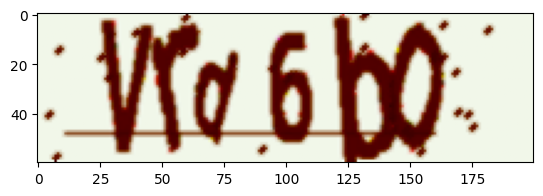

In [ ]:
plt.imshow(train_dataset[0][0].permute(1, 2, 0))

In [ ]:
print([num_to_chars[int(chars)] for chars in train_dataset[0][1]])
train_data[0]

['V', 'r', 'd', '6', 'b', 'o']


PosixPath('data/training/Vrd6bo_3832.png')

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
train_dummy_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dummy_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
for images, labels in train_dummy_loader:
    print("Images batch shape:", images.shape) # Batch size, C, H, W
    print("Labels batch:", labels)
    break

Images batch shape: torch.Size([1, 3, 60, 200])
Labels batch: tensor([[ 4, 15, 36,  3, 26, 15]])
